In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import glob
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

In [58]:
#read besos
df = pd.read_csv("../data-lineas-espectrales/BESOS/2_Be_stars/HD37041/hd37041_2014-01-29_03-58-58_final_corr.txt", sep="\t", header=None)

m1 = df[0] >= 4460
m2 = df[0] <= 4480

df2 = df[m1][m2]

df2

/var/folders/w9/gh780vs52dgb_ypr6vd5g_4m0000gn/T/ipykernel_982/942857022.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df[m1][m2]


,0,1
2367,4460.022618,0.979893
2368,4460.111978,0.998823
2369,4460.201338,1.020981
2370,4460.290697,1.021009
2371,4460.380057,1.018809
...,...,...
2586,4479.592386,0.986350
2587,4479.681746,0.977661
2588,4479.771106,0.998069
2589,4479.860465,0.996876


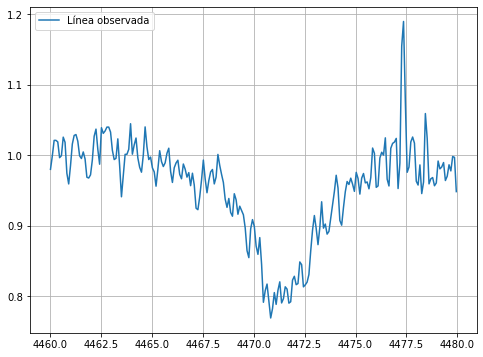

In [59]:
plt.figure(figsize=(8,6))
plt.plot(df2[0], df2[1], label="Línea observada")
#plt.plot(df4[0], df4[1], label="Modelo")
plt.grid()
plt.legend(loc="best")
plt.show()

In [60]:
n = 201  # for 2 random indices
index = np.random.choice(df2[0].shape[0], n, replace=False) 
index.sort()

In [61]:
obs_waves = df2[0].values[index]

obs_flux = df2[1].values[index]
obs_flux.shape

(201,)

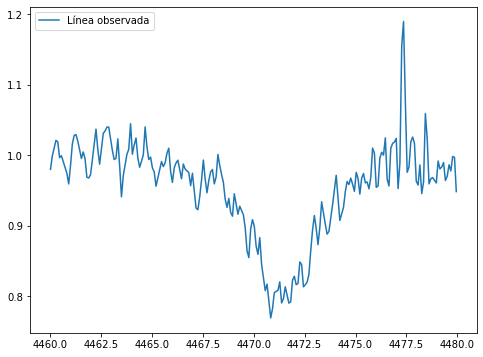

In [62]:
plt.figure(figsize=(8,6))
plt.plot(obs_waves, obs_flux ,label="Línea observada")
plt.legend(loc="best")
plt.show()

In [63]:
time_steps = 201
input_dimension = 1
obs_flux_reshaped = obs_flux.reshape((1, time_steps, input_dimension))

In [68]:
#load model
new_model = tf.keras.models.load_model('../abs_error_66.h5')

In [69]:
pred_obs = new_model.predict(obs_flux_reshaped)

In [70]:
print("t_eff:", pred_obs[0][0])
print("log g:", pred_obs[0][1])
print("v_rot:", pred_obs[0][2])

t_eff: 0.27317777
log g: 0.7502088
v_rot: -0.9454203


In [71]:
standardScaler = StandardScaler()
standardScaler.fit(y)
normalized_y = standardScaler.transform(y)
pred_obs_inv = scaler2.inverse_transform(pred_obs)

array([[[0.97989285],
        [0.99882323],
        [1.02100885],
        [1.01880932],
        [0.99641973],
        [0.99923426],
        [0.97436655],
        [0.95917219],
        [0.98508161],
        [1.01577401],
        [1.02797759],
        [1.02923548],
        [1.01988137],
        [0.99527335],
        [1.00456083],
        [0.99461776],
        [0.96866077],
        [0.96755898],
        [0.97208565],
        [0.99323791],
        [1.03694248],
        [1.00847113],
        [0.98714042],
        [1.03095376],
        [1.03429949],
        [1.03980732],
        [1.03982711],
        [1.00696623],
        [0.99373382],
        [0.99554312],
        [1.02311742],
        [0.98507488],
        [0.94094354],
        [0.97111696],
        [1.0012331 ],
        [1.00825775],
        [1.04460406],
        [1.00136995],
        [1.01454151],
        [1.02430105],
        [0.99605525],
        [0.98279047],
        [1.00017035],
        [1.04009378],
        [1.01191711],
        [0